# Figure 11.19 - CDD map

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import conf
from utils import computation, plot, save_figuredata
import data_tables

mpl.rcParams["figure.dpi"] = 200

In [2]:
FIGURE_FOLDER = "Figure_11.19_CDD_map"

plot.create_figure_folders(FIGURE_FOLDER, conf.cmip6)

## Load data

### global mean tas

In [3]:
c6_tas = conf.cmip6.load_post_all_concat(
    varn="tas",
    postprocess="global_mean"
)

 -- {'varn': 'tas', 'postprocess': 'global_mean', 'table': 'Amon', 'model': 'IITM-ESM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2098)


In [4]:
c6_cdd = conf.cmip6.load_post_all_concat(
    varn="pr", postprocess="cdd_regrid", anomaly="no_anom"
)

-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'cdd_regrid', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'cdd_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'cdd_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'cdd_regrid', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'cdd_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'pr', 'postprocess': 'cdd_regrid', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp370', 'ens': 'r1i1p1

In [5]:
c6_cdd_abs = computation.process_datalist(
    computation.calc_anomaly, c6_cdd, start=1850, end=1900, how="absolute"
)

In [6]:
warming_levels = [1.5, 2.0, 4.0]

c6_at_warming_cdd_abs = computation.at_warming_levels_list(
    c6_tas, c6_cdd_abs, warming_levels=warming_levels
)

## Absolute change

### Simple hatching

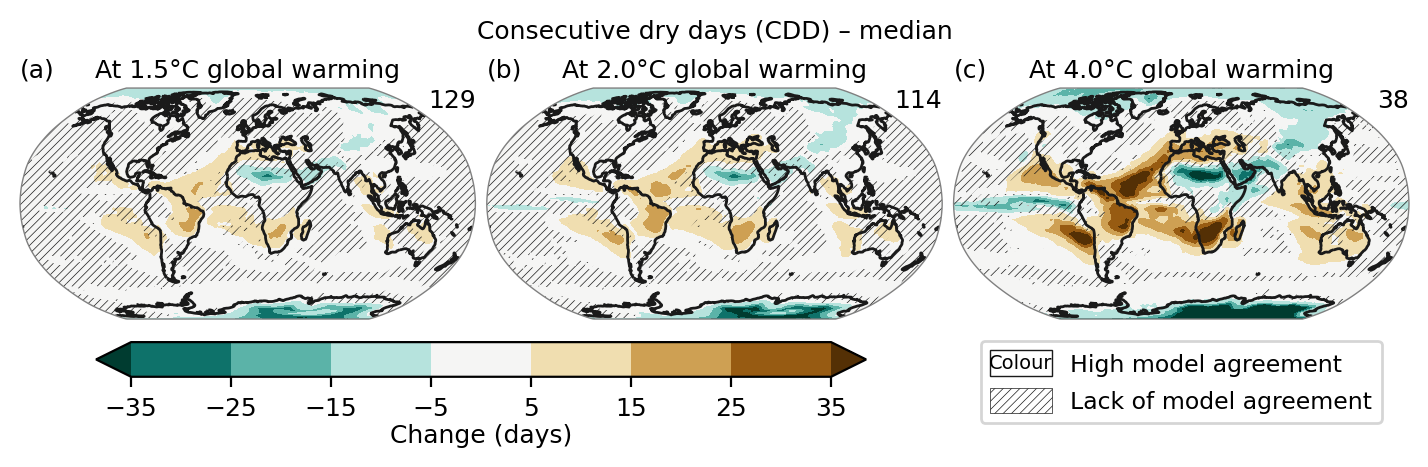

In [7]:
levels = np.arange(-35, 36, 10)

cbar = plot.at_warming_level_one(
    c6_at_warming_cdd_abs,
    "Change (days)",
    "Consecutive dry days (CDD)",
    levels=levels,
    average="median",
    colorbar=True,
    robust=True,
    cmap="BrBG_r",
    skipna=False,
    add_legend=True,
    hatch_simple=0.8,
    plotfunc="contourf",
)


fN = conf.cmip6.figure_filename("CDD_at_w_simple", FIGURE_FOLDER)
plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".png", dpi=300, transparent=False, facecolor="w")

# data tables
fN = conf.cmip6.figure_filename("CDD_at_w_simple", FIGURE_FOLDER, "data_tables")

dta_ = c6_at_warming_cdd_abs
data_tables.save_simulation_info_raw(fN + "_1.5_md_raw", dta_[0], panel="a")
data_tables.save_simulation_info_raw(fN + "_2.0_md_raw", dta_[1], panel="b")
data_tables.save_simulation_info_raw(fN + "_4.0_md_raw", dta_[2], panel="c")


# save figure data

varn = "CDD"
figure = "Figure 11.19"
sfd = save_figuredata.SaveFiguredata(
    figure=figure,
    units="days",
    varn=varn,
)


figure = figure.replace(" ", "_")


panels = ["a", "b", "c"]
for i, warming_level in enumerate([1.5, 2.0, 4.0]):

    panel = panels[i]
    fN = conf.cmip6.figure_filename(
        f"{figure}{panel}_cmip6_{varn}_change_at_{warming_level:0.1f}C.nc",
        FIGURE_FOLDER,
        "figure_data",
        add_prefix=False,
    )

    da = dta_[i]
    da.attrs["long_name"] = "Consecutive dry days"
    da.attrs["comment"] = "anomaly wrt 1850-1900"

    ds = sfd.map_panel(
        da=da,
        average="median",
        panel=panel,
        warming_level=warming_level,
        hatch_simple=0.8,
    )
    ds.to_netcdf(fN)